# Exercise 5

 1. What is the change in pct of divorced danes from 2008 to 2020?
 

In [3]:
import pandas as pd
#5a
data = pd.read_csv("https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=000&Tid=2008K1%2C2020K4&CIVILSTAND=F%2CTOT", sep=";")
print(data)

pct_2008 = (data["INDHOLD"][0] / data["INDHOLD"][1]) * 100
pct_2020 = (data["INDHOLD"][2] / data["INDHOLD"][3]) * 100
print("Change in percentage of divorced danes from 2008:(",pct_2008,"%)","to 2020(",pct_2020,"%)","\nis:", pct_2020 - pct_2008,"%")

        OMRÅDE     TID CIVILSTAND  INDHOLD
0  Hele landet  2008K1   Fraskilt   428864
1  Hele landet  2008K1      I alt  5475791
2  Hele landet  2020K4   Fraskilt   552419
3  Hele landet  2020K4      I alt  5837213
Change in percentage of divorced danes from 2008:( 7.832000892656421 %) to 2020( 9.463745797866208 %) 
is: 1.6317449052097874 %


 2. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
 
  

In [4]:
#5b
data = pd.read_csv("https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=U%2CTOT&OMR%C3%85DE=*&Tid=2020K4", sep=";")
print(data)
data = data.sort_values(by=["INDHOLD"], ascending=False)
regions = data[(data["OMRÅDE"] != "Hele landet") & (~data["OMRÅDE"].str.contains("Region"))]
totals = regions[data["CIVILSTAND"] == "I alt"]
biggest_cities = []

for city in totals["OMRÅDE"]:
    if (city not in biggest_cities) & (len(biggest_cities) < 5):
        biggest_cities.append(city)
        
print(biggest_cities)
current = {"pct": 0, "city": ""}

for city in biggest_cities:
    population = regions[regions["OMRÅDE"] == city]
    unmarried = population.index[1]
    total = population.index[0]
    pct_unmarried = (population["INDHOLD"][unmarried] / population["INDHOLD"][total])*100
    if current["pct"] < pct_unmarried:
        current["city"] = city
        current["pct"] = pct_unmarried
    else:
        continue
        
print(current["city"], "has the highest percentage of never married at",current["pct"],"%\n","of the 5 biggest cities")




    CIVILSTAND              OMRÅDE     TID  INDHOLD
0        Ugift         Hele landet  2020K4  2859116
1        Ugift  Region Hovedstaden  2020K4   981652
2        Ugift           København  2020K4   417782
3        Ugift       Frederiksberg  2020K4    61020
4        Ugift              Dragør  2020K4     5856
..         ...                 ...     ...      ...
205      I alt               Morsø  2020K4    20135
206      I alt              Rebild  2020K4    30438
207      I alt             Thisted  2020K4    43217
208      I alt     Vesthimmerlands  2020K4    36458
209      I alt             Aalborg  2020K4   219310

[210 rows x 4 columns]
['København', 'Aarhus', 'Aalborg', 'Odense', 'Vejle']
København has the highest percentage of never married at 65.4896415941411 %
 of the 5 biggest cities


/tmp/ipykernel_472/4172414816.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  totals = regions[data["CIVILSTAND"] == "I alt"]


 3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now


In [33]:
#5c
import matplotlib.pyplot as plt
data = pd.read_csv("https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=U%2CG%2CE%2CF&OMR%C3%85DE=101&Tid=*", sep=";")
print(data)


    CIVILSTAND     OMRÅDE     TID  INDHOLD
0        Ugift  København  2008K1   309661
1        Ugift  København  2008K2   311978
2        Ugift  København  2008K3   311868
3        Ugift  København  2008K4   315545
4        Ugift  København  2009K1   317126
..         ...        ...     ...      ...
235   Fraskilt  København  2021K4    55305
236   Fraskilt  København  2022K1    55415
237   Fraskilt  København  2022K2    55496
238   Fraskilt  København  2022K3    55348
239   Fraskilt  København  2022K4    55040

[240 rows x 4 columns]


In [47]:
#5d
pop_status = {}
time_q4 = []

for time_period in list(data['TID'].unique()):
     if(time_period.split('K')[1] == '4'):
        time_q4.append(time_period)

for time in time_q4:
   
    year = data['TID'] == time
    Marital_status = data['CIVILSTAND'] == 'Gift/separeret'
    area = data['OMRÅDE'] == "København"
    status = sum(data[year & Marital_status & area]['INDHOLD'])
    pop_status[time]=status
    
print(pop_status)

{'2008K4': 130727, '2009K4': 133014, '2010K4': 135341, '2011K4': 136965, '2012K4': 137880, '2013K4': 139664, '2014K4': 139729, '2015K4': 141141, '2016K4': 143024, '2017K4': 145607, '2018K4': 148172, '2019K4': 150492, '2020K4': 150663, '2021K4': 150219, '2022K4': 152604}


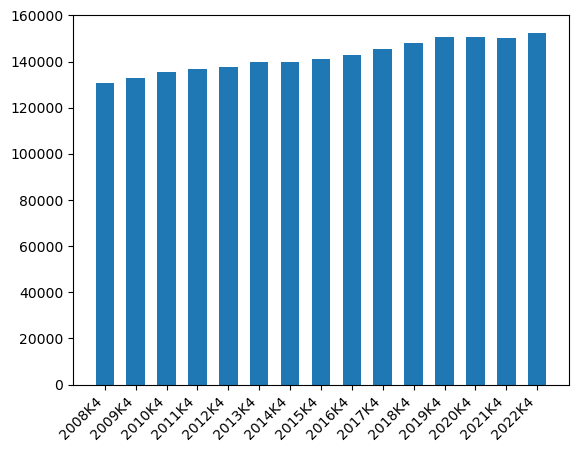

In [48]:
import matplotlib.pyplot as plt
plt.bar(list(pop_status.keys()), list(pop_status.values()), width=0.6, align='center')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light')
plt.show()

  4. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs

In [50]:
data = pd.read_csv("https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&ALDER=*&CIVILSTAND=U%2CG&Tid=2020K4", sep=";")
data

,ALDER,CIVILSTAND,TID,INDHOLD
0,I alt,Ugift,2020K4,2859116
1,I alt,Gift/separeret,2020K4,2138124
2,0 år,Ugift,2020K4,61381
3,0 år,Gift/separeret,2020K4,0
4,1 år,Ugift,2020K4,61650
...,...,...,...,...
249,123 år,Gift/separeret,2020K4,0
250,124 år,Ugift,2020K4,0
251,124 år,Gift/separeret,2020K4,0
252,125 år,Ugift,2020K4,0


In [51]:
data = data[data['ALDER'] != 'I alt']
data

,ALDER,CIVILSTAND,TID,INDHOLD
2,0 år,Ugift,2020K4,61381
3,0 år,Gift/separeret,2020K4,0
4,1 år,Ugift,2020K4,61650
5,1 år,Gift/separeret,2020K4,0
6,2 år,Ugift,2020K4,62532
...,...,...,...,...
249,123 år,Gift/separeret,2020K4,0
250,124 år,Ugift,2020K4,0
251,124 år,Gift/separeret,2020K4,0
252,125 år,Ugift,2020K4,0


In [53]:
ages = list(data['ALDER'].unique())
ages

['0 år',
 '1 år',
 '2 år',
 '3 år',
 '4 år',
 '5 år',
 '6 år',
 '7 år',
 '8 år',
 '9 år',
 '10 år',
 '11 år',
 '12 år',
 '13 år',
 '14 år',
 '15 år',
 '16 år',
 '17 år',
 '18 år',
 '19 år',
 '20 år',
 '21 år',
 '22 år',
 '23 år',
 '24 år',
 '25 år',
 '26 år',
 '27 år',
 '28 år',
 '29 år',
 '30 år',
 '31 år',
 '32 år',
 '33 år',
 '34 år',
 '35 år',
 '36 år',
 '37 år',
 '38 år',
 '39 år',
 '40 år',
 '41 år',
 '42 år',
 '43 år',
 '44 år',
 '45 år',
 '46 år',
 '47 år',
 '48 år',
 '49 år',
 '50 år',
 '51 år',
 '52 år',
 '53 år',
 '54 år',
 '55 år',
 '56 år',
 '57 år',
 '58 år',
 '59 år',
 '60 år',
 '61 år',
 '62 år',
 '63 år',
 '64 år',
 '65 år',
 '66 år',
 '67 år',
 '68 år',
 '69 år',
 '70 år',
 '71 år',
 '72 år',
 '73 år',
 '74 år',
 '75 år',
 '76 år',
 '77 år',
 '78 år',
 '79 år',
 '80 år',
 '81 år',
 '82 år',
 '83 år',
 '84 år',
 '85 år',
 '86 år',
 '87 år',
 '88 år',
 '89 år',
 '90 år',
 '91 år',
 '92 år',
 '93 år',
 '94 år',
 '95 år',
 '96 år',
 '97 år',
 '98 år',
 '99 år',
 '100 år',

In [59]:
married = []
unmarried = []
for age in ages:
    mask = data['ALDER'] ==  age
    m_status1 = data['CIVILSTAND'] == 'Gift/separeret'
    m_status2 = data['CIVILSTAND'] == 'Ugift'
    married.append(sum(data[ m_status1 & mask]['INDHOLD']))
    unmarried.append(sum(data[ m_status2 & mask]['INDHOLD']))



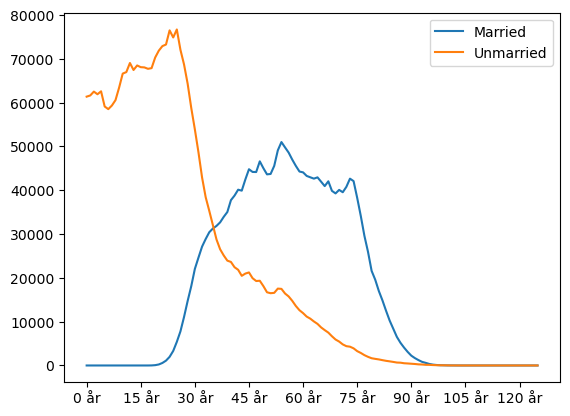

In [62]:
plt.plot(ages,married, label='Married')
plt.plot(ages,unmarried, label='Unmarried')
plt.xticks(ages[::15])
plt.legend()